In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

In [2]:
Data_Path = "/kaggle/input/loan-prediction/loan.csv"

In [3]:
data = pd.read_csv(Data_Path)

In [4]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# **Information of data**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# **Description of data**

In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
def pie_chart(column):
    # Plotting the pie chart
    plt.figure(figsize=(5, 5))
    plt.pie(column, labels=column.index, autopct='%1.1f%%', startangle=140)

    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.axis('equal')
    plt.title(str(column))
    # Show the plot
    plt.show()

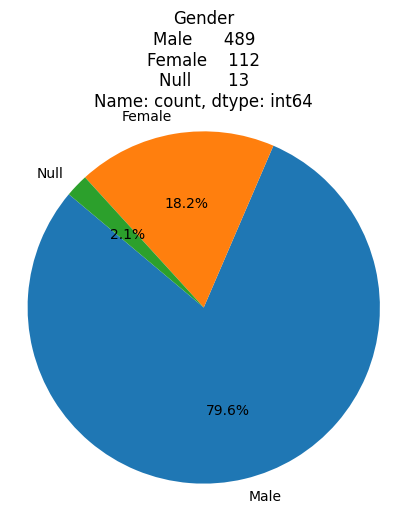

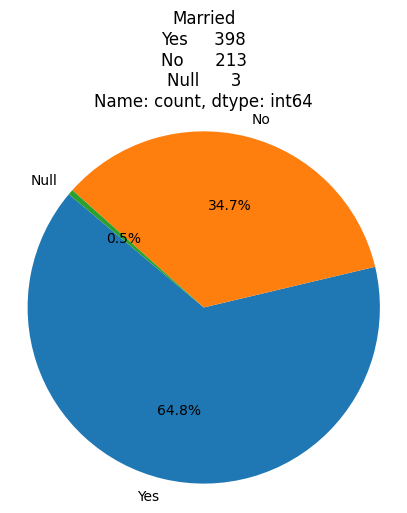

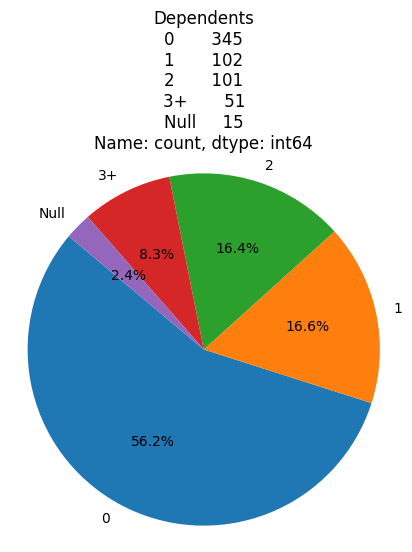

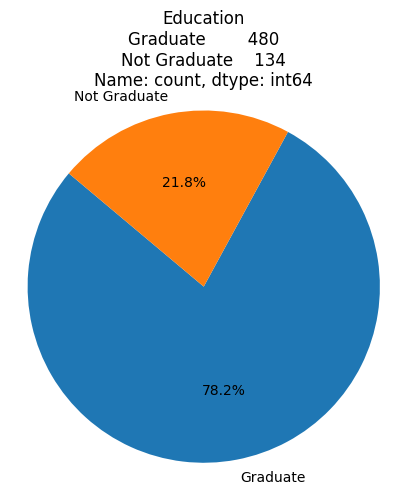

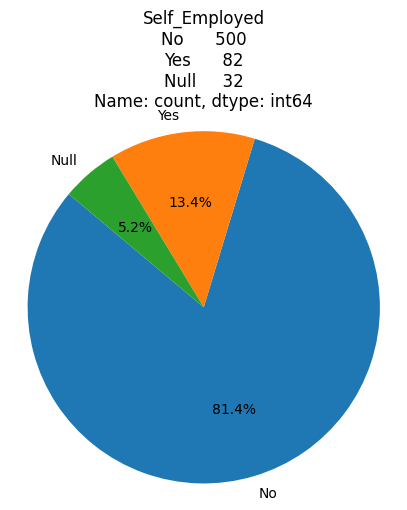

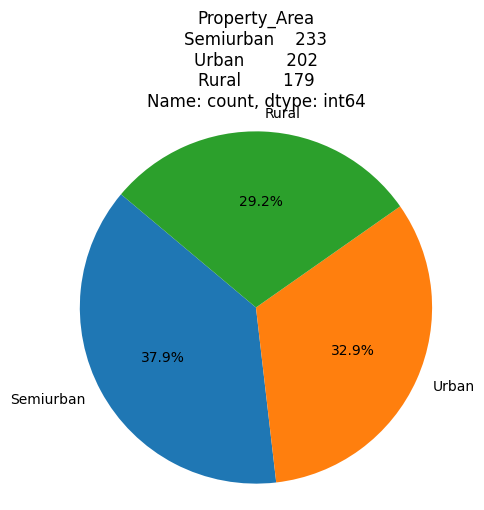

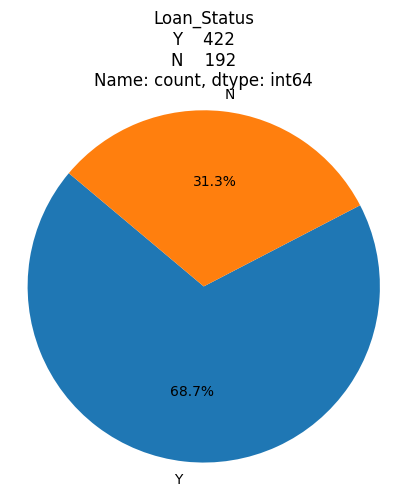

In [8]:
for column in (data.columns):
    if data[column].dtype == 'object' and  column != 'Loan_ID':
        # Count the number of null values in the column
        data_column = data[column].value_counts()

        null_count = data[column].isnull().sum()

        # If there are null values, include them in the pie chart
        if null_count > 0:
            data_column['Null'] = null_count
        pie_chart(data_column)       

## Pie Charts show that: 

### Gender Column 
- Males are the most people that apply for loan 
- Has 13 null so we can fill them with male 'mode' as it is the most frequent value

### Married Column 
- Married people are the most people that apply for loan 
- Has 3 null so we can fill them with Yes 'mode' as it is the most frequent value

### Dependents Column 
- Has 15 null so we can fill them with 0 'mode' as it is the most frequent value

### Self_Employed Column 
- Has 32 null so we can fill them with No 'mode' as it is the most frequent value

In [9]:
# Dropping Loan_ID column 
data.drop(['Loan_ID'],axis=1,inplace=True)

# **Check Null at each column**

In [10]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
for col in data.columns:
    if data[col].dtype == 'object':
        # For object (categorical) columns, replace missing values with the mode
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        # For numeric columns, replace missing values with the median
        data[col] = data[col].fillna(data[col].median())


# **After filling Null**

In [12]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Apply label encoder to categorical columns

In [13]:
def labelencoder(df):
    for c in df.columns:
        if df[c].dtype=='object': 
            lbl = preprocessing.LabelEncoder()
            df[c] = lbl.fit_transform(df[c])
    return df

In [14]:
data=labelencoder(data)

# Correlation Matrix

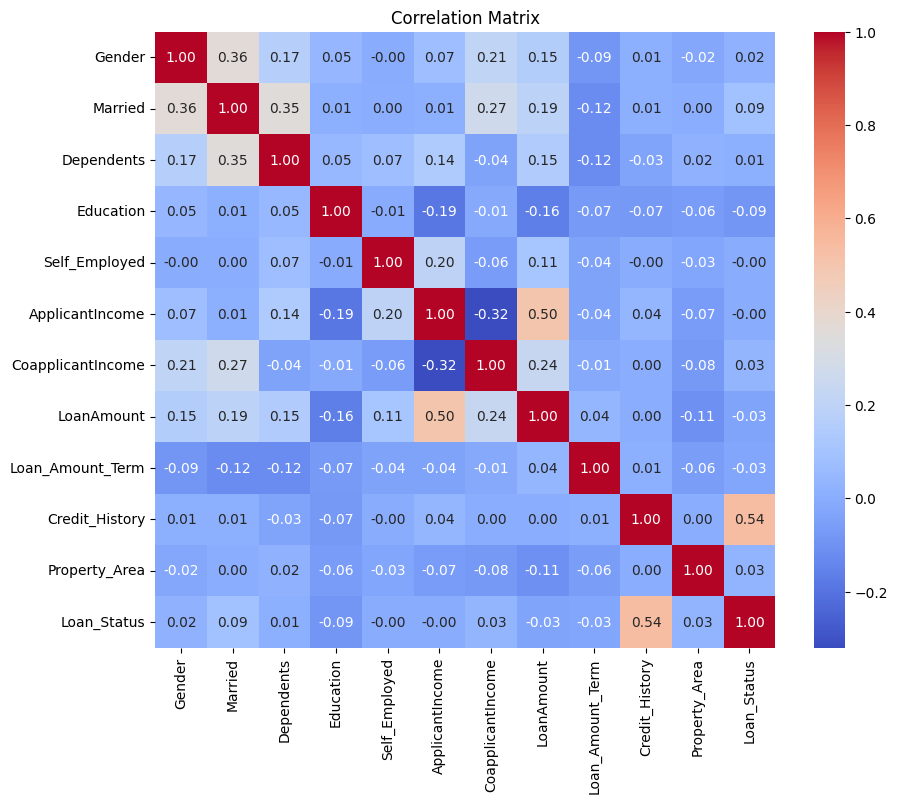

In [15]:
# Calculate correlation matrix
correlation_matrix = data.corr(method="spearman")

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **BoxPlot for columns**

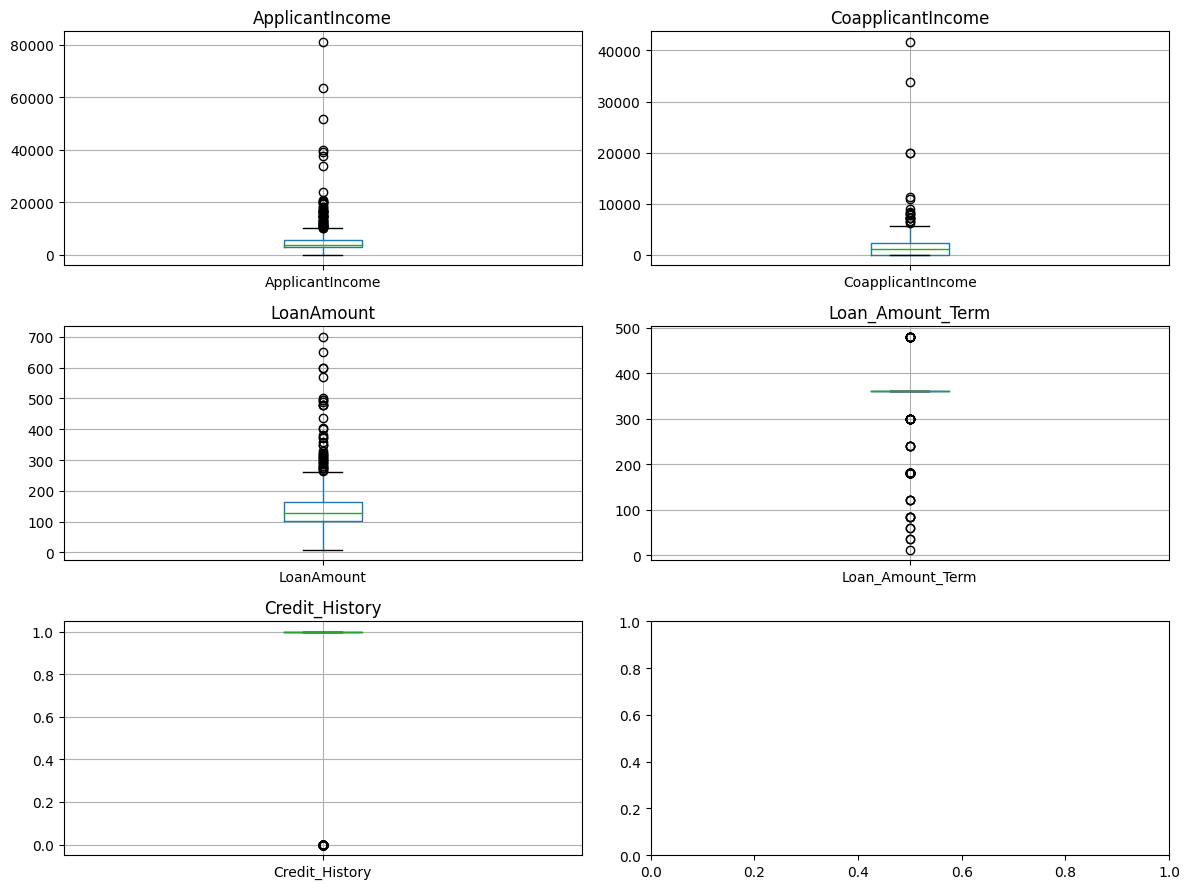

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 9))
axes = axes.flatten()

columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
# Loop through each column
i=0
for column in columns:
        # Create a boxplot for the current column
        data.boxplot(column=column, ax=axes[i])
        axes[i].set_title(column)
        i+=1

# Adjust layout
plt.tight_layout()
plt.show()

## BoxPlots show that :
- There are many outliers at many columns 
- we need to handel these values

## Define a function to replace outliers with IQR bounds

In [17]:
def replace_outliers_with_iqr(df):
    # Filter numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    # Calculate IQR only for numeric columns
    Q1 = df[numeric_columns].quantile(0.25)
    Q3 = df[numeric_columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with IQR bounds for numeric columns
    for column in numeric_columns:
        df[column] = np.where(df[column] < lower_bound[column], lower_bound[column], df[column])
        df[column] = np.where(df[column] > upper_bound[column], upper_bound[column], df[column])
    
    return df

# Replace outliers using IQR bounds for all columns
data = replace_outliers_with_iqr(data)

## BoxPlots after replace outliers with IQR bounds

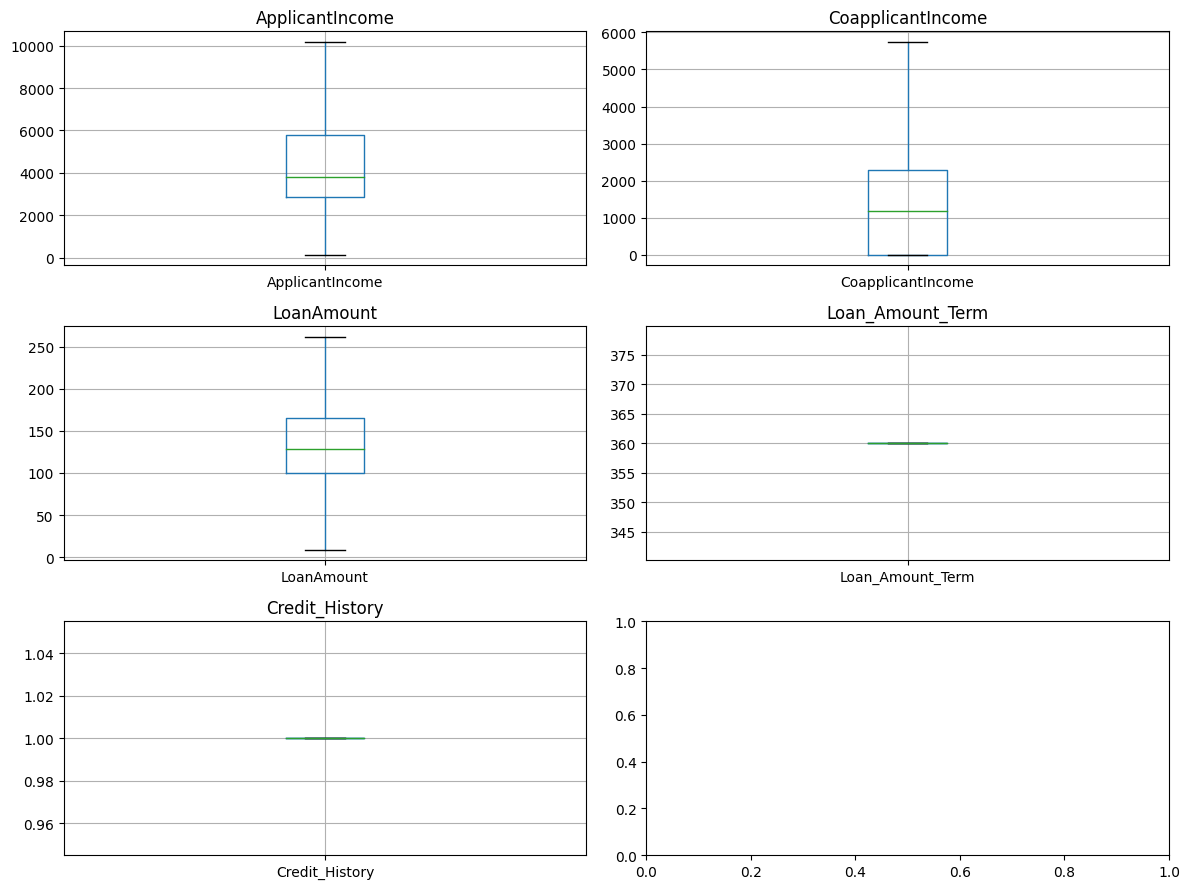

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 9))
axes = axes.flatten()

columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
# Loop through each column
i=0
for column in columns:
        # Create a boxplot for the current column
        data.boxplot(column=column, ax=axes[i])
        axes[i].set_title(column)
        i+=1

# Adjust layout
plt.tight_layout()
plt.show()

# Show distribution of columns

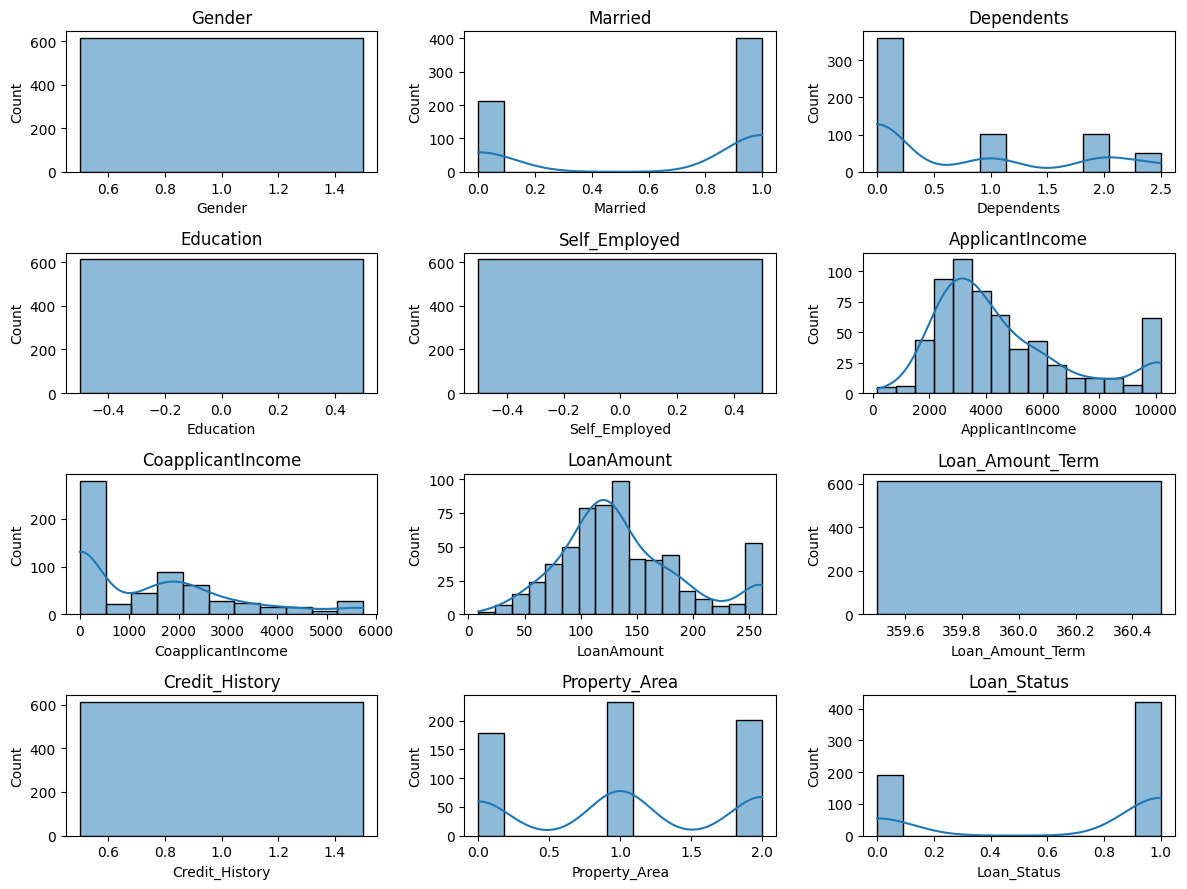

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the number of rows and columns for subplots
nrows = 4
ncols = 3

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 9))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column
for i, column in enumerate(data.columns):
    # Create a distribution plot for the current column
    sns.histplot(data[column], ax=axes[i], kde=True)
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()

# **Split Data to Features and Label**

In [20]:
X = data.drop(columns=['Loan_Status'], axis=1) # Feature
Y = data['Loan_Status']  # Label

# Feature Selection using ANOVA F-value

In [21]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, Y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Create a DataFrame with the selected features
X = pd.DataFrame(X_selected, columns=selected_features)

# Split Data to Train & Test 80:20

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=True, random_state=42)

# Split Train to Train and validation 70:10

In [23]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, shuffle=True, random_state=42)

# Apply Feature scaling using StandardScaler

In [24]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

# **Model Step**
## From characteristics of Target varible it is a classification problem

In [25]:
lr = LogisticRegression(solver='newton-cg', penalty='l2', C=1)

lr.fit(x_train, y_train)

y_pred_log = lr.predict(x_val)

accuracy_log = accuracy_score(y_val, y_pred_log)
# accuracy
print("LogisticRegression validation Accuracy", accuracy_log * 100)


LogisticRegression validation Accuracy 76.0


In [26]:
dtc = DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=25, max_depth=9)

dtc.fit(x_train, y_train)

y_pred_tree = dtc.predict(x_val)

accuracy_tree = accuracy_score(y_val, y_pred_tree)
# accuracy
print("DecisionTreeClassifier validation Accuracy", accuracy_tree * 100)

DecisionTreeClassifier validation Accuracy 68.0


In [27]:
rfc = RandomForestClassifier(n_estimators = 7, 
                             criterion = 'entropy', 
                             random_state =7) 
rfc.fit(x_train, y_train)

y_pred_rfc = rfc.predict(x_val)

accuracy_rfc = accuracy_score(y_val, y_pred_rfc)
# accuracy
print("RandomForestClassifier validation Accuracy", accuracy_rfc * 100)

RandomForestClassifier validation Accuracy 56.00000000000001


In [28]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_val)

accuracy_knn = accuracy_score(y_val, y_pred_knn)
# accuracy
print("KNeighborsClassifier validation Accuracy", accuracy_knn * 100)

KNeighborsClassifier validation Accuracy 62.0


In [29]:
svc = SVC() 
svc.fit(x_train, y_train)

y_pred_svc = svc.predict(x_val)

accuracy_svc = accuracy_score(y_val, y_pred_svc)
# accuracy
print("SVC validation Accuracy", accuracy_svc * 100)

SVC validation Accuracy 76.0


# **Model Evaluation on Test data**

In [30]:
y_pred_lr = lr.predict(x_test)
y_pred_dtc = dtc.predict(x_test)
y_pred_rfc = rfc.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_svc = svc.predict(x_test)


accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_tree = accuracy_score(y_test, y_pred_dtc)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svc = accuracy_score(y_test, y_pred_svc)


# accuracy

print("LogisticRegression Test Accuracy", accuracy_lr * 100)
print("SVC Test Accuracy", accuracy_svc * 100)
print("KNeighborsClassifier Test Accuracy", accuracy_knn * 100)
print("DecisionTreeClassifier Test Accuracy", accuracy_tree * 100)
print("RandomForestClassifier Test Accuracy", accuracy_rfc * 100)

LogisticRegression Test Accuracy 65.04065040650406
SVC Test Accuracy 65.04065040650406
KNeighborsClassifier Test Accuracy 60.97560975609756
DecisionTreeClassifier Test Accuracy 59.34959349593496
RandomForestClassifier Test Accuracy 56.09756097560976
